###  <font color="#347C98">Authors:</font>
- Alicia Gunawan	
- Amber Rhea Olsen
- Jonathan Tanoto	
- Cze Tang	

#  <font color="#347C98">Question</font>


Our data science question is: 

**Do states that voted Republican in the 2016 Presidential election have higher rates of gun violence than states that voted Democratic?**


We hypothesize that Republican-leaning states will have higher rates of gun violence compared to Democratic leaning states because the Republican platform strongly supports 2nd amendment rights, meaning that it is more likely that states supporting said platform would have less gun control and thus more gun owners.
 

#  <font color="#347C98">Background</font>

We were curious if violent gun crimes were more prevalent in states with less gun control. Initially, we thought that Republican-leaning states would have higher gun crime rates, as they would likely have less regulations on fire arms. Several articles support our hypothesis of Republican-leaning states having higher crime rates, one of which claiming that '[Red States Have Higher Crime Rates Than Blue States](http://editions.lib.umn.edu/smartpolitics/2009/09/16/red-states-have-higher-crime-r/)'. However it did not focus on gun crime specifically, but on violent crimes instead. While others, such as this [Mother Jones article](https://www.motherjones.com/politics/2013/01/pro-gun-myths-fact-check/) that also supported the claim have a certain political bias, in this case leaning more on the left, raising certain credibility issues. Using the 2016 presidential election as a marker of a state's political affliation, we compared gun crime rates between Democratic and Republican leaning states, to better understand the relationship between the two.

# <font color="#347C98">Data Source</font>

Our data set contains over 260,000 incidents of gun violence in the United States between the years 2013-2018. This data is spread across all 50 states and broken down into stats state by state. We will use this data along with official election results (link below) to see if our hypothesis is true.

We used Kaggle to obtain our gun violence data here: https://www.kaggle.com/jameslko/gun-violence-data. The dataset was downloaded as an Excel spreadsheet, but since the file size was too large to be uploaded into Google Sheets we had to remove many variables irrelevant to our research before we could make it available.

It is now available to graders here: https://docs.google.com/spreadsheets/d/1okNywJAOm4Jr1pHZEKm6ery094_n-E37p8zJFY0eOyo/edit?usp=sharing

We removed sensitive personal information (names of parties involved, addresses, congressional districts, etc). Said variables were deleted to satisfy ethical standards and to reduce file size. However, variables relevant to our research (state of incident, number of people wounded/dead) were kept on the file.

We collected data about which states voted by which party here: https://transition.fec.gov/pubrec/fe2016/2016presgeresults.pdf

We have added a column to our dataset that specifies which states voted Republican and which Democratic (by electoral votes) in the 2016 election and cross-reference the gun violence dataset with the data regarding the election results.

# <font color="#347C98"> Ethical Considerations </font>





### Data Collection 

We did not directly collect any of the data--both of our data sets are publically available online. However, gun violence is by nature a sensitive and controversial topic, so we have taken care to remove personally identifying information. Since our research question is limited to the rate of gun violence in US states, any identifying information is limited to state level. Names, addresses, latitude/longitude, location descriptions, and essentially anything too specific has been removed. 



### Data Storage

The original datasets are publically available. However, our own dataset and the conclusions we drew from it are stored on Google Drive, where it is likely be safe due to limited and explicitedly granted access. As stated before, any personally identifying information has been removed from our dataset. Additionally, any unnecessary data will not be retained after the project, and will be deleted from the Google Drive.



### Analysis

Our research question deals with a contentious issue in the US--gun control--we have tried to make the analysis as objective as possible. We have tried to present the data from a neutral and unbiased standpoint without making any accusatory statements against either party. While it is unlikely that either dataset will have any overt bias, it is possible that only using one election from 2016 against the gun violence dataset--which records incidents from 2013 all the way to 2018--may produce skewed results in terms of the political leanings of the state. We will keep our eyes open for potential bias and confounding factors that may affect our conclusions. Additionally, any PII will not be used in the analysis. 

The process of analyzing our data and drawing our conclusions from it is documented--this will ensure that our conclusions are reproducible, and will also make it easier for us to check the validity of our conclusions.



### Modeling

We do not include gender, race, family relationship, or any personal information as variables. We only look at crime geographically and compare that to party preference. In addition, we try to remain objective and prevent from drawing conclusions based around our personal beliefs. We also try to prevent any of our data from lending credence to discriminatory statements by using only strictly relevant results.



### Deployment

We try to be sensitive with this topic because of its political nature. Additionally, we have tried to keep our scope modest to avoid blanket statements about political preference. By keeping our goal as narrow as possible, we avoid drawing biased conclusions regarding either party. Additionally, if our dataset were to ever be released, it should be emphasized to users that the project is not meant to show that either party or any state is better than others. 


# <font color="#347C98">Importing Data</font>

In [0]:
#imports to upload data via google sheets, use pandas with gspread API and data wrangling
import pandas as pd
import numpy as np
from datetime import datetime
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

#getting permission from OAuth for GoogleCredentials to access sheets
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# uploading our Kaggle gun violence dataset and making a dataframe worksheet
gun_violence = gc.open_by_url('https://docs.google.com/spreadsheets/d/1okNywJAOm4Jr1pHZEKm6ery094_n-E37p8zJFY0eOyo/edit#gid=399193208')
ws = gun_violence.worksheet('gun-violence-data_2013_2018')
gun_crime = get_as_dataframe(ws) # this dataset is now named gun_crime

# uploading our 2016 presidential election results and making a dataframe worksheet
pres_results_2016 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1buWENpvNj6kTdClFwx8-BPul6qHAZ1QFB3-67To2z9M/edit#gid=0')
ws_2 = pres_results_2016.get_worksheet(0)
pres_2016_election = pd.DataFrame(ws_2.get_all_records())

# uploading our u.s. census data and making a dataframe worksheet
census_est = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Dw4rcNKuQEAN1ph2HZaf98iEPceJRpIq_Qr1nXGcEn0/edit#gid=0')
ws_3 = census_est.get_worksheet(0)
us_census = pd.DataFrame(ws_3.get_all_records())

# <font color="#347C98">Data Wrangling</font>


For the purpose of convenience (and running our code faster) we've erased text cell descriptions from Importing Data and Data Wrangling. No changes have been made to any section, so those descriptions can be viewed on the past assignments on Gradescope (Assignment 3 is the most complete one). We still have comments in both sections that explain what is going on.

In [0]:
# drop Unnamed: 5 and Unnamed: 6 columns
gun_crime = gun_crime.drop(axis=1, columns=['Unnamed: 5', 'Unnamed: 6'])

# drop two empty rows
gun_crime = gun_crime.drop([239677, 239678], axis=0)

# convert float values to int
gun_crime['incident_id']=gun_crime.incident_id.astype('int64')
gun_crime['n_killed']=gun_crime.n_killed.astype('int64')
gun_crime['n_injured']=gun_crime.n_injured.astype('int64')

# convert date formats to YYYY/MM/DD
dates_array = pd.to_datetime(gun_crime['date'])
gun_crime.date = dates_array

# convert date to year
gun_crime = gun_crime.assign(year = lambda ID: pd.DatetimeIndex(list(gun_crime.date)).year)

# replace date column with year column
gun_crime = gun_crime[['incident_id', 'year', 'state', 'n_killed', 'n_injured']]

#for convenience, we will only be using the 2016 column--we drop everything else
us_census = us_census.drop(axis=1, columns=['2010', '2011', '2012', '2013', '2014', '2015', 'Census', 'Estimates Base'])

# merge columns from the gun_crime and us_census dataset together
gun_crime = pd.merge(us_census, gun_crime, left_on='Geographic Area', right_on="state", how='right')

# drop Geographic Area, rename 2016 column
gun_crime = gun_crime.drop(axis=1, columns=['Geographic Area'])
gun_crime = gun_crime.rename(index=str, columns={'2016':'population_2016'})

# for the 2016 presidential election data, find out which party won which states through the electoral votes
pres_2016_election.columns = ['electoral_votes', 'electoral_votes_trump', 'electoral_votes_clinton', 'state']
pres_2016_election['party'] = np.where(pres_2016_election.electoral_votes_trump > pres_2016_election.electoral_votes_clinton, 'Republican', 'Democrat')

# merge the gun_crimes and pres_2016_election data
gun_crime = pd.merge(pres_2016_election, gun_crime, left_on='state', right_on='state', how='right')
gun_crime = gun_crime.drop(axis=1, columns=['electoral_votes', 'electoral_votes_trump', 'electoral_votes_clinton'])

# find the number of incidences in each state
num_incidences = gun_crime.groupby('state').agg({'incident_id':len})
num_incidences.columns = ['number_of_incidences']
num_incidences = num_incidences.reset_index(drop=True).assign(state = lambda ID: pres_2016_election.state)

# NEW LINE find the number of people killed in each state
num_killed = gun_crime.groupby('state').agg({'n_killed':sum})
num_killed.columns = ['number_killed']
num_killed = num_killed.reset_index(drop=True).assign(state = lambda ID: pres_2016_election.state)

# NEW LINE merge num_killed with gun_crime
gun_crime = pd.merge(num_killed, gun_crime, left_on='state', right_on='state', how='right')

# NEW LINE find the number of people injured in each state
num_injured = gun_crime.groupby('state').agg({'n_injured':sum})
num_injured.columns = ['number_injured']
num_injured = num_injured.reset_index(drop=True).assign(state = lambda ID: pres_2016_election.state)

# NEW LINE merge num_injured with gun_crime
gun_crime = pd.merge(num_injured, gun_crime, left_on='state', right_on='state', how='right')

# merge num_incidences with gun_crime
gun_crime = pd.merge(num_incidences, gun_crime, left_on='state', right_on='state', how='right')

# add the prevalence of gun incidents per 1000 people as a column
gun_crime = gun_crime.assign(incidence_per_1000 = lambda ID: gun_crime.number_of_incidences/(gun_crime.population_2016/1000))

# UPDATED add the prevalence of gun deaths per 1000 people as a column
gun_crime = gun_crime.assign(deaths_per_1000 = lambda ID: gun_crime.number_killed/(gun_crime.population_2016/1000))

# UPDATED add the prevalence of gun injuries per 1000 people as a column
gun_crime = gun_crime.assign(injuries_per_1000 = lambda ID: gun_crime.number_injured/(gun_crime.population_2016/1000))

# UPDATED finalizing the gun_crime data by rearranging some columns and dropping the population_2016 column
gun_crime = gun_crime.drop(axis=1, columns=['population_2016'])
gun_crime = gun_crime.reindex(['incident_id', 'year', 'state', 'party', 'n_injured','n_killed','incidence_per_1000', 'deaths_per_1000', 'injuries_per_1000'], axis=1)

# tidying the u.s. census data just in case
us_census.columns = ['2016_population', 'state']
us_census = us_census.reindex(['state', '2016_population'], axis=1)

# pres_2016_election rearrangement of columns
pres_2016_election = pres_2016_election.reindex(['state', 'electoral_votes', 'electoral_votes_trump', 'electoral_votes_clinton', 'party'], axis=1)

# NEW LINE make a table displaying the various means of gun_crime
gun_crime_mean = gun_crime.groupby('state', as_index=False).agg({'incidence_per_1000':'mean', 'deaths_per_1000':'mean', 'injuries_per_1000':'mean'})
gun_crime_mean = gun_crime_mean.merge(pres_2016_election[['state', 'party']], on='state', how='left')

gun_crime_mean.head()




,state,incidence_per_1000,deaths_per_1000,injuries_per_1000,party
0,Alabama,1.124956,0.386569,0.616454,Republican
1,Alaska,1.818319,0.359890,0.438068,Republican
2,Arizona,0.335879,0.157840,0.158129,Republican
3,Arkansas,0.951059,0.258680,0.450766,Republican
4,California,0.415439,0.141707,0.194752,Democrat


# <font color="#347C98">Exploratory Data Analysis</font>

In [0]:
# importing seaborn and matplotlib
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [0]:
# Table 1: Comparisons between the mean incidence_per_1000 of Democratic and Republican states
compare_incidence = gun_crime_mean.groupby('party').agg(
    {'incidence_per_1000':np.mean}).reset_index(drop=True).assign(party = lambda ID: ["Democrat", "Republican"])

# Table 2: Comparisons between the mean deaths_per_1000 of Democratic and Republican states
compare_deaths = gun_crime_mean.groupby('party').agg(
    {'deaths_per_1000':np.mean}).reset_index(drop=True).assign(party = lambda ID: ["Democrat", "Republican"])

# Table 3: Comparisons between the mean injuries_per_1000 of Democratic and Republican states
compare_injuries = gun_crime_mean.groupby('party').agg(
    {'injuries_per_1000':np.mean}).reset_index(drop=True).assign(party = lambda ID: ["Democrat", "Republican"])

# Table 4: A combined version of Table 1, 2, and 3
combined_party_comparison = compare_incidence.assign(deaths_per_1000 = lambda ID: compare_deaths.deaths_per_1000).assign(
    injuries_per_1000 = lambda ID: compare_injuries.injuries_per_1000)

combined_party_comparison

,incidence_per_1000,party,deaths_per_1000,injuries_per_1000
0,0.926400,Democrat,0.164462,0.396548
1,0.877318,Republican,0.215576,0.379411


In [0]:
# Rearranging Table 4
combined_party_comparison.reindex(["party", "incidence_per_1000", "deaths_per_1000", "injuries_per_1000"], axis = 1)

,party,incidence_per_1000,deaths_per_1000,injuries_per_1000
0,Democrat,0.926400,0.164462,0.396548
1,Republican,0.877318,0.215576,0.379411


Table 4 above provides a numerical comparison between the various states and the prevalence of gun-related crimes, deaths, and injuries caused by said crimes. One can see that Democrat-leaning states have a higher mean incidence per 1000 and injuries per 1000, but have less deaths than Republican-leaning states. The following barplots help us visualize this data better.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


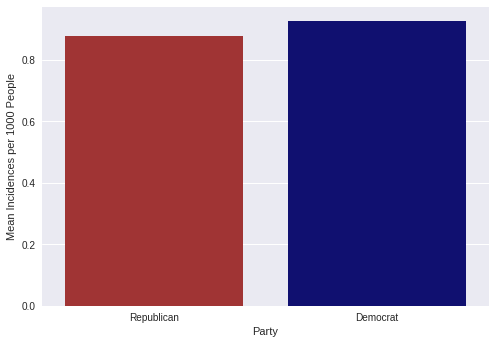

In [0]:
# barchart comparing violent incidence in Dem. v. Rep. states
mean_incidents_state = sns.barplot(x='party', y='incidence_per_1000', palette=['firebrick', 'navy'], data=gun_crime_mean, ci=False);
mean_incidents_state.set(xlabel="Party", ylabel="Mean Incidences per 1000 People")
plt.show()

The barchart above compares the mean number of gun-related criminal incidences in Democrat-leaning and Republican-leaning states. The x-axis of this plot shows the party affiliation, while the y-axis shows the mean incidences per 1000 of all the states--this is done by filtering gun_crime_mean for Democrat and Republican states, and calculating the incidences_per_1000 mean separately. See Table 1 and 4 for further clarification.

We can see from this barchart that the mean number of incidences are fairly similar, with the mean for Democrat-leaning states leading by a slight margin.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


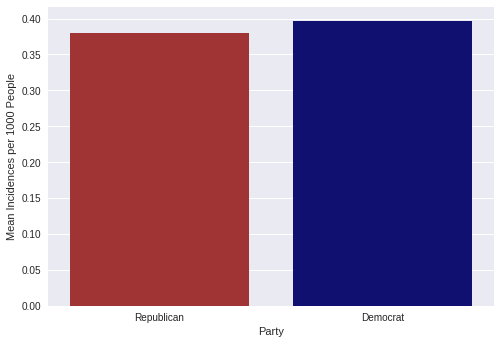

In [0]:
# barchart comparing gun injuries in Dem. v. Rep. states
mean_injuries_state = sns.barplot(x='party', y='injuries_per_1000', palette=['firebrick', 'navy'], data=gun_crime_mean, ci=False);
mean_injuries_state.set(xlabel="Party", ylabel="Mean Incidences per 1000 People")
plt.show()

This bar chart compares the mean injuries from gun crimes per 1000 people in Republican and Democrat-leaning states. See Table 3 and 4 for further clarification on how the values were produced.

Like the first bar chart, one can note that Democrat-leaning states have a slightly higher mean injuries per 1000 people compared to Republican states. The difference between both states is the lowest in this bar chart compared to the rest--this is apparent even if we do not look at the table and simply judge from the bar chart and the axis values.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


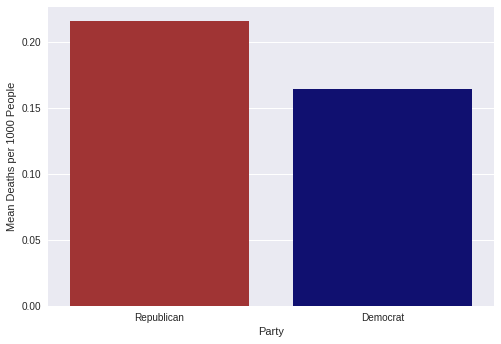

In [0]:
# barchart comparing gun deaths in Dem. v. Rep. states
mean_deaths_state = sns.barplot(x='party', y='deaths_per_1000', palette=['firebrick', 'navy'], data=gun_crime_mean, ci=False);
mean_deaths_state.set(xlabel="Party", ylabel="Mean Deaths per 1000 People")
plt.show()

The bar chart above is similar to the previous one, but compares the mean deaths per 1000 people in Republican and Democrat-leaning states. See Table 2 and 4 for further clarification on how the values were produced.

One can see that there is a wider margin for mean deaths per 1000 people compared to incidences. Additionally, the mean number of deaths per 1000 people is greater in Republican than Democratic states.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


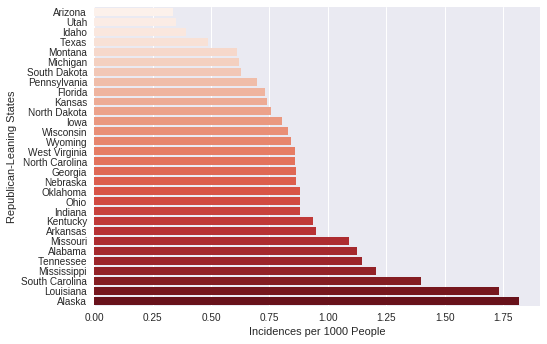

In [0]:
# corraling data only from Republican states
republican = gun_crime_mean['party'] == "Republican"

# sorting incidence from greatest to smallest
sorted_incidence = gun_crime_mean.sort_values('incidence_per_1000')

# barchart comparing gun violence incidence between Rep. states
compare_rep_incid = sns.barplot(x='incidence_per_1000', y='state', data= sorted_incidence[republican], palette='Reds');
compare_rep_incid.set(xlabel="Incidences per 1000 People", ylabel="Republican-Leaning States")
plt.show()

The barchart above compares the number of incidences between Republican states. On the x-axis is the number of incidences per 1000 of state population in 2016, and on the y-axis are the Republican states, sorted by the states with the lowest prevalence of gun crime incidences to highest, with Arizona having the lowest number of incidences per 1000 people and Alaska having the highest.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


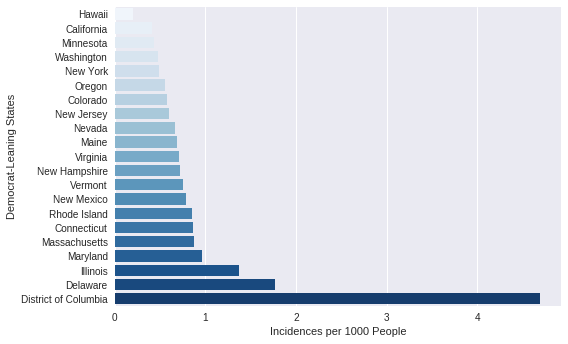

In [0]:
# corraling data only from Democratic states
democrat = gun_crime_mean['party'] == "Democrat"

# barchart comparing gun violence incidence between Dem. states
compare_dem_incid = sns.barplot(x='incidence_per_1000', y='state', data= sorted_incidence[democrat], palette='Blues');
compare_dem_incid.set(xlabel="Incidences per 1000 People", ylabel="Democrat-Leaning States")
plt.show()

The barchart above compares the number of incidences per 1000 people between Democratic states. On the x-axis is the number of incidences per 1000 people of each state population in 2016, and on the y-axis are the Democratic states, sorted by the states with the lowest number of incidences to highest. The clear outlier in this graph is the District of Columbia with around 4.5 incidences per 1000 people. This skews the perspective and is likely responsible for why the number of incidences per 1000 for all Democratic states is higher than the Republican states.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


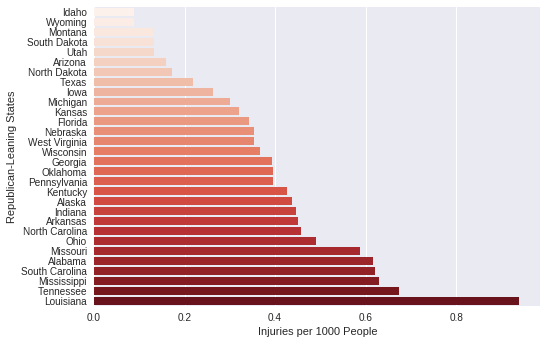

In [0]:
# sorting gun injuries from greatest to smallest
sorted_injuries = gun_crime_mean.sort_values('injuries_per_1000')

# barchart comparing gun injuries between Rep. states
compare_rep_injury = sns.barplot(x='injuries_per_1000', y='state', data= sorted_injuries[republican], palette='Reds');
compare_rep_injury.set(xlabel="Injuries per 1000 People", ylabel="Republican-Leaning States")
plt.show()

This barchart compares the number of injuries per 1000 people from gun-related crimes in Republican states. The x-axis measures the prevalence of deaths from each population, and the y-axis lists the Republican states, sorted by the states with the lowest to highest number of deaths per 1000 people. In this case, Iowa has the lowest prevalence of injuries while Louisiana has the highest.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


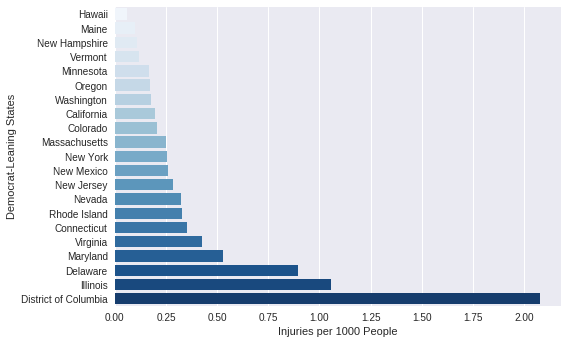

In [0]:
# barchart comparing gun injuries among Dem. states
compare_dem_injury = sns.barplot(x='injuries_per_1000', y='state', data= sorted_injuries[democrat], palette='Blues');
compare_dem_injury.set(xlabel="Injuries per 1000 People", ylabel="Democrat-Leaning States")
plt.show()

The barchart above compares the prevalence of injuries between Democratic states. On the x-axis is the number of injuries per 1000 people of each state's population in 2016. The y-axis lists the Democratic states, sorted by the lowest to highest prevalence of injuries.

By comparing both the Democratic and Republican bar charts, one can see that there is minimal difference, but--again--the District of Columbia is another outlier that may have skewed the prevalence of injuries for the Democratic states. The margin between the District of Columbia and the second highest state--Illinois--in injuries per 1000 people is also quite significant. Perhaps if we removed this outlier it would be easier to analyze any differences.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


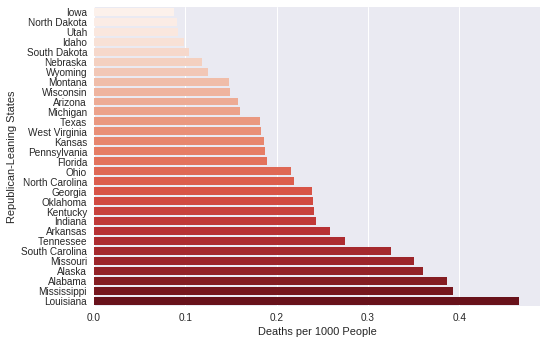

In [0]:
# sorting gun deaths from greatest to smallest
sorted_deaths = gun_crime_mean.sort_values('deaths_per_1000')

# barchart comparing gun deaths between Rep. states
compare_rep_death = sns.barplot(x='deaths_per_1000', y='state', data= sorted_deaths[republican], palette='Reds');
compare_rep_death.set(xlabel="Deaths per 1000 People", ylabel="Republican-Leaning States")
plt.show()

The barchart above compares the number of deaths per 1000 people between Republican states. On the x-axis is the number of deaths per 1000 people of state population in 2016, and on the y-axis are the Republican-leaning states, sorted by the states with the lowest prevalence of deaths to highest. In this case, Iowa has the lowest prevalence of deaths for Republican-leaning states, while Louisiana has the most.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


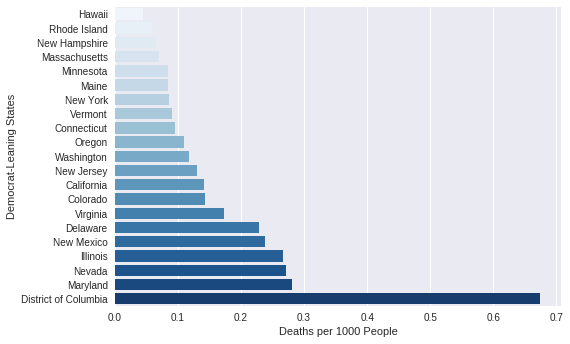

In [0]:
# barchart comparing gun deaths among Dem. states
compare_dem_deaths = sns.barplot(x='deaths_per_1000', y='state', data= sorted_deaths[democrat], palette='Blues');
compare_dem_deaths.set(xlabel="Deaths per 1000 People", ylabel="Democrat-Leaning States")
plt.show()

The barchart above compares the prevalence of deaths between Democratic states. On the x-axis is the number of deaths per 1000 people of each state's population in 2016, and on the y-axis are the Democratic states, sorted by the states with the lowest number of deaths per 1000 people to highest. Similarly to the graph comparing the prevalence of incidences, the clear outlier in this graph is also the District of Columbia which raises the prevalence of deaths for all Democratic states combined.

However, unlike the prevalence of incidences, it is slightly easier to compare Democrat and Republican-leaning states because the outlier doesn't have as much of a difference with the other states. One can see that the majority of Democratic-leaning states have less than 0.2 deaths per 1000 people, unlike Republican-leaning states--which have around half of their states that had a value of 0.2 deaths per 1000 people or higher.

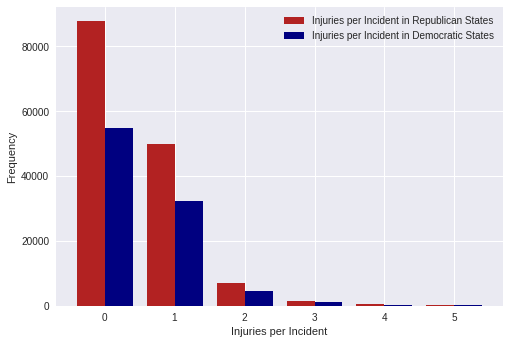

In [0]:
# histogram comparing the number of injuries per incident in Republican and Democrat-leaning states
rep_injuries = np.asarray(gun_crime[gun_crime["party"] == "Republican"].reindex(["n_injured"], axis=1))
dem_injuries = np.asarray(gun_crime[gun_crime["party"] == "Democrat"].reindex(["n_injured"], axis=1))

plt.hist([rep_injuries, dem_injuries], color = ["firebrick", "navy"], bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], label = [
    "Injuries per Incident in Republican States", "Injuries per Incident in Democratic States"])
plt.xlabel("Injuries per Incident")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The histogram above is a combination of two histograms--one depicting the frequency of the number of injuries per incident in Democrat-leaning states, and another depicting the same thing except in Republican-leaning states. For easy viewing, the bins have been placed at -0.5, 0.5, and so on. One can see that Republican-leaning states have greater frequencies for all values--this is likely because there are more Republican states than Democrat-leaning states, so a population difference may be a confounding factor here.

The differences in value tend to smooth out as the number of injuries grows higher--this may also explain why Democrat-leaning states have higher prevalence of injury from gun-related crimes, as seen in Table 4.

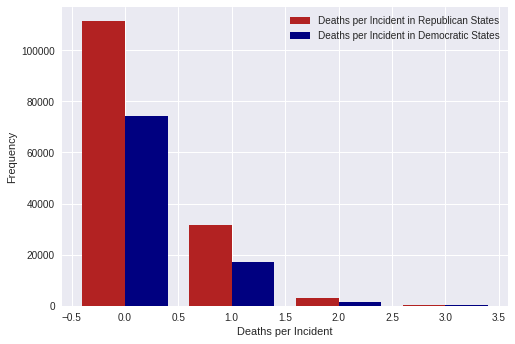

In [0]:
# histogram comparing the number of deaths per incident in Republican and Democrat-leaning states
rep_deaths = np.asarray(gun_crime[gun_crime["party"] == "Republican"].reindex(["n_killed"], axis=1))
dem_deaths = np.asarray(gun_crime[gun_crime["party"] == "Democrat"].reindex(["n_killed"], axis=1))

plt.hist([rep_deaths, dem_deaths], color = ["firebrick", "navy"], bins = [-0.5, 0.5, 1.5, 2.5, 3.5], label = [
    "Deaths per Incident in Republican States", "Deaths per Incident in Democratic States"])
plt.legend()
plt.xlabel("Deaths per Incident")
plt.ylabel("Frequency")
plt.show()

The histogram above is a combination of two histograms--one depicting the frequency of the number of deaths per incident in Democrat-leaning states, and another depicting the same thing except in Republican-leaning states. Bins here have also been placed at -0.5, 0.5, and so on. Like the previous histogram, Republican-leaning states have greater frequencies for all values--population differences may still be a confounding factor here.

Something to note is that the ratio between Republican and Democrat-leaning states for 0 deaths is roughly 3:2, but the ratio for 1 death is 2:1. This may explain why Republican states have a higher prevalence of deaths.

# <font color="#347C98">Analysis Proposal</font>


If any analysis is to be done effectively, political affiliation needs to be expressed as a dummy variable—that is, political affiliation = x1, where x1 = 0 indicates Democrat and x1 = 1 indicates Republican. This would let us formulate simple linear regression models with the following equations.

Prevalence of Gun Crimes = b0 + b1*x1

Prevalence of Gun Injuries = c0 + c1*x1

Prevalence of Gun Deaths = d0 + d1*x1

Obviously, this simple model does have limitations. There is no nuance to how political affiliation of a state is determined—we only used the 2016 Presidential election as an indicator of a state’s political affiliation. By aggregating statistics from past elections, we could have created an index measuring how left-leaning a state is. By doing so, we would create a continuous independent variable (instead of it being dichotomous). Such indexes have been done—see the [Cook Partisan Voter Index](https://cookpolitical.com/introducing-2017-cook-political-report-partisan-voter-index), which measures trends of a state’s political leanings. The lack of other control variables also calls any conclusions of this experiment into question--this limitation will be explained below. 
 
Additionally, we could also conduct a t-test--[see here](https://www.spss-tutorials.com/independent-samples-t-test/) for a reference on doing this test. We would compare Democrat and Republican states’ prevalence of gun crimes, injuries, and deaths with this test and compare the mean of the prevalence for each political affiliation. Since we don’t know the standard deviation of each distribution of the prevalence for Democrat and Republican states, we will need to calculate that and take it into account. We will set the p-value maximum (alpha level) to 0.05--this means that our results are statistically significant (and thus not based on coincidence) if the p-value is found to be less than 0.05. 

Then it would come to the conclusion that we take the null hypothesis of there is no correlation between the states’ part affiliations and the prevalence of gun crime, injuries, and deaths. 

The t-test would help us compare the mean of the prevalence of the instances for each political party, and see if there really is a significant difference. This will further assert if our findings are actually proven ‘good enough’ to be true. If we set the p-value to be less than .05, and actually get it to be that value, then that means there would be a 5% chance of getting the same results through chance alone. This suggests that our findings can be drawn to a conclusion.

A major limitation of this analysis is that it does not take into consideration any control factors--this makes it impossible for us to determine causality. Culture, location, socioeconomic status, and many other confounding factors limit the effectiveness of this analysis. The most we can determine is the correlation between gun violence and party affiliation. Again, to improve our analysis, we would take into consideration more presidential elections than just one, and also consider other variables such as those stated above. By gathering a list of factors (unemployment, education, poverty, etc.) that compound gun violence, we can control other variables to produce a more accurate analysis. 

However, it would also be interesting to take this analysis to a state level--our data visualizations answered many questions but also raised new questions about our data set and the trends underlying it. We did not explore what effect our outliers were having on our mean or how variance compared betwen Republican and Democratic states. Most notably, the Democratic District of Colombia stood out as unusual in our data set. The prevalence of gun-related deaths was more than double the next highest state: Maryland. Likewise its prevalence of gun-related injuries was almost double, and its incidence per 1000 people was close to triple that of the next highest state. It was by far the outlier of Democratic state violence, raising questions about why it has such high rates of gun violence relative to other Democratic states. On the Republican side, Louisiana was an outlier, but there appeared to be less variance than on the Democratic side. We would like to analyze these trends further, look at the interquartile range of Republican and Democratic states' gun crime so we can see how much the outliers are influencing the mean.

Our data is relatively unbiased--it is (presumably) objectively collected and measures all of US. We aren’t excluding any of the incidents and we likely have very little to no misreporting because the data comes from reliable sources. The issue with our data is mostly the lack of control variables, not from any bias. However, that could also lead to observer bias on our side, where we could misinterpret a correlation between party affiliation and gun violence because of a lack of other factors accounted for. 

# <font color="#347C98">Summary</font>


In this project, we wanted to determine if gun violence rates were higher in states that voted Republican compared to states that voted Democrat in the 2016 Presidential election. Our hypothesis was that Republican states would have higher gun violence rates due to the Republican stance on gun control, which is less emphasized compared to Democrat-leaning states. To find gun violence data, we looked to a Kaggle dataset listing all incidences of gun violence--and the resulting deaths and injuries--between 2013 to 2018. We joined that data with two other datasets: a table containing the electoral votes each state allotted to each party, and another table listing the population data for each state. 

We hypothesized that Republican-leaning states would have higher rates of gun violence compared to Democrat-leaning states because the Republican platform strongly supports 2nd amendment rights, meaning states supporting said platform would be more likely to have less gun control. 

For starters, it was interesting to see the mean incidences per 1000 people per state tends to be slightly higher for democratic states than republic states. For the mean deaths per 1000 people per state for republican states is higher than it is for the democratic states. In terms of prevalence rates, there was a higher prevalence for democratic states, and also higher injuries per 1000 people. Deaths per 1000 people for each state was found higher for the Republican states. The distribution of incidence per 1000 people for republican states tend to be less consistent among states, than it is for the democratic states. However, notice that the states of Delaware and DC spikes the consistency of the distribution for the democratic states. 

We would use the t-test and a linear regression model to analyze the final dataset. For the former, we would compare the mean of prevalences from each political affiliation, and if the mean of prevalences (for incidents, deaths, and injuries) is higher for Republican states, our hypothesis would be correct. For the latter, we would convert the categorical variable--political affiliation--into a dummy variable x1, where, say, 0 equals Democrat and 1 equals Republican. We would formulate the simple linear regression model with the following equations:
Prevalence of Gun Crimes = b0 + b1*x1
Prevalence of Gun Injuries = c0 + c1*x1
Prevalence of Gun Deaths = d0 + d1*x1
If we find that the prevalence of gun crimes/injuries/deaths goes up as x1 increases from 0 to 1, then we could tentatively suggest a positive correlation, where Republican states would have higher levels of gun violence. 

However, this analysis does have many limitations. First of all, we only used the data from the 2016 presidential election to determine political affiliation of a state--we could have used more data from past presidential elections or from county/city level to assess political affiliation more accurately. Additionally, we also had no control variables, so it would be virtually impossible to conclude causation since there are so many confounding variables--unemployment, education, or poverty just for some examples--that have not been taken into account. Ideally, we would have controlled many other variables and refined our process for determining political affiliation to produce a more accurate analysis. 

If we could discover a correlation between political affiliation and gun violence, it could open up new discussions on what appropriate laws and platforms need to be maintained or discarded to prevent gun violence. Additionally, people can potentially misinterpret our findings, thinking that either Democrat or Republican-leaning states (whichever political affiliation is linked with increased gun violence) are more dangerous, setting a harmful stereotype--this would be an ecological fallacy. 



